In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
df = pd.DataFrame(columns = ['stop', 'eps', 'delta', 'iter', 'autovec', 'EPS'])

for x in ['15', '20', '25']:
    with open("../analysis/potencia_conv_eps" + x, 'r') as pot:
        nxt = 0
        for line in pot:
            nxt += 1
            autovec = {'EPS' : float('1e-'+x), 'autovec' : nxt}
            
            line = line[line.find("STOP:") + 6:]
            autovec['stop'] = int(line[0])
            line = line[line.find("EPS:")+5:]
            autovec['eps'] = float(line[:line.find('D')])
            line = line[line.find('DELTA:') + 7:]
            autovec['delta'] = int(line[:line.find('I')])
            line = line[line.find('ITER:') + 6:]
            autovec['iter'] = int(line)
            df = df.append(autovec, ignore_index=True)


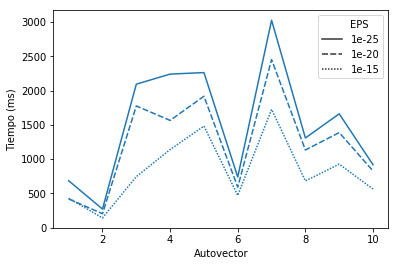

In [179]:
sns.lineplot(x="autovec", y="delta",
             style="EPS",
             data=df)
plt.ylabel('Tiempo (ms)')
plt.xlabel('Autovector')
plt.savefig('img/conv-tiempo-eps.jpg')
plt.show()

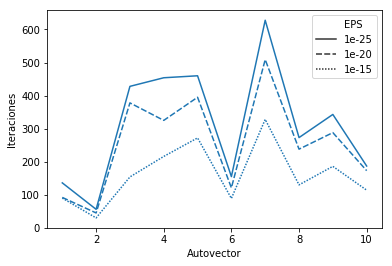

In [180]:
ax = sns.lineplot(x="autovec", y="iter",
             style="EPS",
             data=df)
plt.ylabel('Iteraciones')
plt.xlabel('Autovector')
plt.savefig('img/conv-iter-eps.jpg')
plt.show()

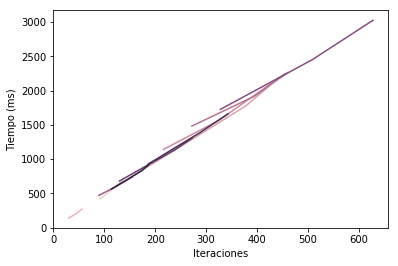

In [190]:
sns.lineplot(x="iter", y="delta",
             hue="autovec", legend=False,
             data=df)
plt.ylabel('Tiempo (ms)')
plt.xlabel('Iteraciones')
plt.savefig('img/conv-tiempo-iter.jpg')
plt.show()

In [182]:
df2 = pd.DataFrame(columns = ['stop', 'eps', 'logeps', 'delta', 'iter', 'autovec', 'EPS'])

with open("../analysis/potencia_conv_cadaiter_eps25", 'r') as pot:
    nxt = 1
    for line in pot:
        autovec = {'EPS' : 25, 'autovec' : int(nxt)}

        line = line[line.find("STOP:") + 6:]
        autovec['stop'] = int(line[0])
        line = line[line.find("EPS:")+5:]
        autovec['eps'] = float(line[:line.find('D')])
        autovec['logeps'] = np.log10(autovec['eps'])
        line = line[line.find('DELTA:') + 7:]
        autovec['delta'] = int(line[:line.find('I')])
        line = line[line.find('ITER:') + 6:]
        autovec['iter'] = int(line)
        df2 = df2.append(autovec, ignore_index=True)
        if autovec['stop'] > 0:
            nxt += 1


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


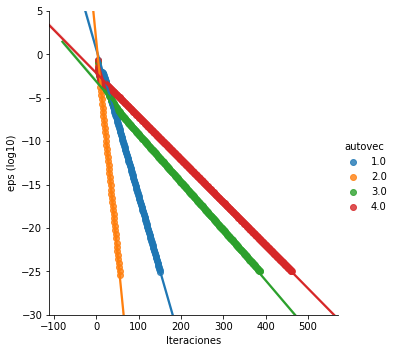

In [183]:
sns.lmplot(x="iter", y="logeps", hue ='autovec', data=df2[df2.autovec < 5][df2.iter > 1])
# sns.regplot(x="iter", y="logeps", data=df2[df2.autovec == 1.0][df2.iter > 1], x_bins = 30 )
plt.ylim(-30, 5)
plt.ylabel('eps (log10)')
plt.xlabel('Iteraciones')
plt.savefig('img/conv-eps-iter-eps25.jpg')
plt.show()

In [184]:
df3 = pd.DataFrame(columns = ['stop', 'eps', 'logeps', 'delta', 'iter', 'autovec', 'EPS'])

with open("../analysis/potencia_conv_cadaiter_iter400", 'r') as pot:
    nxt = 1
    for line in pot:
        autovec = {'EPS' : 25, 'autovec' : int(nxt)}

        line = line[line.find("STOP:") + 6:]
        autovec['stop'] = int(line[0])
        line = line[line.find("EPS:")+5:]
        autovec['eps'] = float(line[:line.find('D')])
        autovec['logeps'] = np.log10(autovec['eps'])
        line = line[line.find('DELTA:') + 7:]
        autovec['delta'] = int(line[:line.find('I')])
        line = line[line.find('ITER:') + 6:]
        autovec['iter'] = int(line)
        df3 = df3.append(autovec, ignore_index=True)
        if autovec['stop'] > 0:
            nxt += 1


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


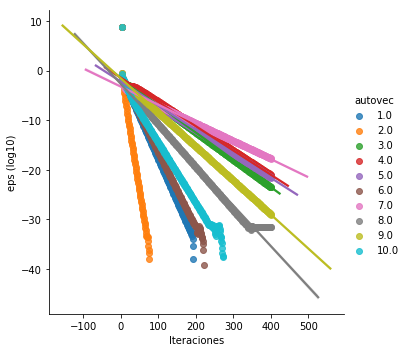

In [194]:
sns.lmplot(x="iter", y="logeps", hue ='autovec', data=df3[df3.autovec < 11][df3.iter > 1] )
# sns.regplot(x="iter", y="logeps", data=df2[df2.autovec == 1.0][df2.iter > 1], x_bins = 30 )
plt.ylabel('eps (log10)')
plt.xlabel('Iteraciones')
plt.savefig('img/conv-eps-iter-iter400.jpg')
plt.show()

In [193]:
df3[df3.autovec == 1]

,stop,eps,logeps,delta,iter,autovec,EPS
0,0.0,0.000000e+00,-inf,0.0,1.0,1.0,25.0
1,0.0,5.715740e+08,8.757072,6.0,2.0,1.0,25.0
2,0.0,1.885180e-01,-0.724647,11.0,3.0,1.0,25.0
3,0.0,7.818220e-02,-1.106892,17.0,4.0,1.0,25.0
4,0.0,2.897910e-02,-1.537915,23.0,5.0,1.0,25.0
5,0.0,1.222870e-02,-1.912620,28.0,6.0,1.0,25.0
6,0.0,6.890650e-03,-2.161740,34.0,7.0,1.0,25.0
7,0.0,4.620760e-03,-2.335287,40.0,8.0,1.0,25.0
8,0.0,3.262960e-03,-2.486388,45.0,9.0,1.0,25.0
9,0.0,2.309550e-03,-2.636473,51.0,10.0,1.0,25.0
